<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/non_seprable_dataset_make_circles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Classification on a non-seprable dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression

(500, 2)


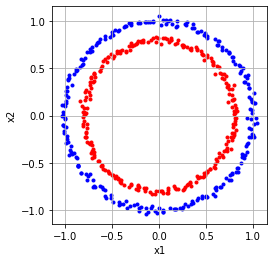

In [ ]:
# generating data 
x, y = make_circles(n_samples = 500, noise = 0.02)
print(x.shape)

# visualizing data
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.scatter(x[:, 0], x[:, 1], c = y, marker = '.') 
plt.scatter(x[y==1, 0], x[y==1, 1], marker = '.', color='red') 
plt.scatter(x[y==0, 0], x[y==0, 1], marker = '.', color='blue') 
ax.set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show() 

(500, 3)


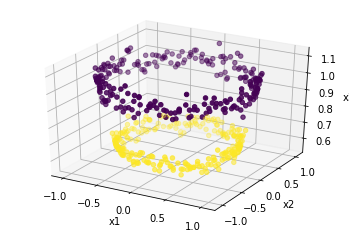

In [ ]:
# adding a new dimension to X 
x1 = x[:, 0].reshape((-1, 1))
x2 = x[:, 1].reshape((-1, 1)) 
x3 = (x1**2 + x2**2) # introduce a higher order feature

X = np.hstack((x, x3))
print(X.shape)
  
# visualizing data in higher dimension 
# adding higher order features to make it linearly seprable (hybothesis: w0+w1*x1+w2*x2+w3*x1^2+w4*x2^2>=0)
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(x1, x2, x1**2+x2**2, c=y, depthshade = True)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

In [ ]:
# fit a logistic regression (classification) model
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)
print(model.coef_)
print(model.intercept_)

error = np.mean(y-y_pred)
print(error)

[[-5.80275841e-02  4.57033206e-04 -1.08704276e+01]]
[8.91999302]
0.0


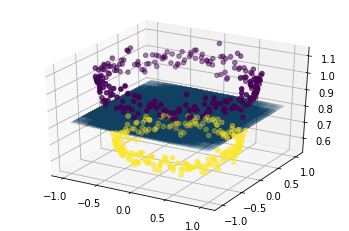

In [ ]:
# plotting the separating hyperplane 
w = model.coef_
b = model.intercept_
x1g, x2g = np.meshgrid(x1, x2) 
x3g = -(w[0][0]*x1g + w[0][1]*x2g + b) / w[0][2] 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x1**2 + x2**2, c = y, depthshade = True) 
ax = fig.gca(projection = '3d') 
ax.plot_surface(x1g, x2g, x3g, alpha = 0.01) 
plt.show()

[[-8.1698977  -8.17596729]]
[6.70983834]
0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


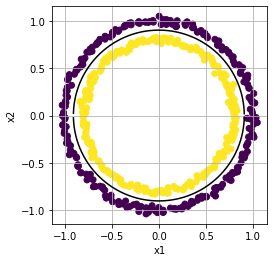

In [ ]:
# fit a logistic regression (classification) model for higher order features
model = LogisticRegression()

X =np.hstack((x1**2, x2**2))

model.fit(X,y)

y_pred = model.predict(X)

print(model.coef_)
print(model.intercept_)

error = np.mean(y-y_pred)
print(error)

xd1 = np.arange(x1.min(), x1.max(),0.001)
xd2 = -(model.coef_[0,0] * xd1**2 + model.intercept_)/model.coef_[0,1]
xd2 = np.sqrt(xd2)

# visualizing data
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x1, x2, c =y)
plt.plot(xd1,xd2,'k-',xd1,-xd2,'k-')
ax.set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show() 